In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import LeaveOneOut
from sklearn.naive_bayes import GaussianNB
from sklearn import svm


###reading data
missing_value=['?']
data = pd.read_csv("data/eye-tracking and others.csv",na_values=missing_value, delimiter=",")

# print(data.isnull().sum())
print(data.shape)
##removing missing values
data.dropna(inplace=True)
#16 row removed.
print(data.shape)
# data
# CDT culomn is eliminated because this culomn is empty.

(120, 62)
(104, 62)


In [43]:
data1, data3 = data.copy(), data.copy()
data1["group"] = np.array([1 if yins ==2 else 0 if yins == 1 else np.nan for yins in data1.values[:,0]])
data3["group"] = np.array([1 if yins ==3 else 0 if yins == 1 else np.nan for yins in data3.values[:,0]])
data1.dropna(inplace=True)
data3.dropna(inplace=True)


X=data1.iloc[:,1:]
y=data1.iloc[:,0]
# X = X.astype(np.float64)
# y = y.astype(np.float64)

# X=data3.iloc[:,1:]
# y=data3.iloc[:,0]
X.shape

(85, 61)

[0.01462481 0.         0.00144558 0.01642667 0.01171049 0.01851833
 0.00477608 0.01041558 0.05846911 0.00144558 0.00309767 0.
 0.02233077 0.0147524  0.02643717 0.00093695 0.0795388  0.00803099
 0.01693167 0.0127578  0.00549264 0.0230925  0.0095631  0.00286679
 0.01181399 0.07702449 0.0250435  0.01429516 0.         0.02817684
 0.01927438 0.01441546 0.0054345  0.0050257  0.00305178 0.01591857
 0.01193176 0.01333381 0.         0.0190432  0.00565994 0.00064248
 0.00183565 0.0537908  0.10286834 0.03609681 0.04857752 0.0037172
 0.         0.00949546 0.00050194 0.         0.01731544 0.00736823
 0.         0.00458914 0.02907516 0.01254265 0.0016062  0.01746569
 0.01940676]


c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


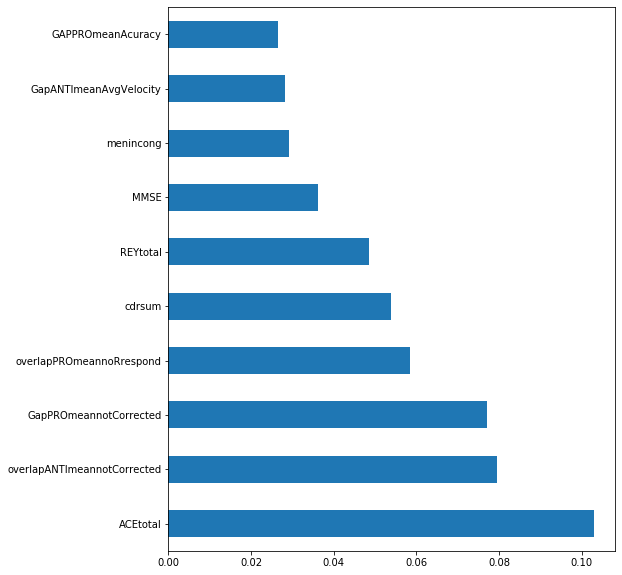

In [48]:
# import pandas as pd
# import numpy as np
# data = pd.read_csv("D://Blogs//train.csv")
# X = data.iloc[:,0:20]  #independent columns
# y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [49]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.277843
Best score using built-in LassoCV: 0.641550


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [52]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
coef

Lasso picked 22 variables and eliminated the other 39 variables


OverlapPROmeanPrimaryAmplitude_ang    -0.000000
overlapPROmeanPrimaryLatency           0.000081
OverlapPROmeanAvgVelocity             -0.000220
GAP1PROmeanError                       0.005833
overlapptoImeanFirstGain              -0.000000
Gap1ANTImeanAcuracy                   -0.000000
OverlapPROmeanPeakVelocity            -0.000012
overlapPROmeannotCorrected             0.000000
overlapPROmeannoRrespond               0.000000
OverlapANTImeanPrimaryAmplitude_ang    0.000000
overlapANTImeanPrimaryLatency          0.000153
OverlapANtimeanAvgVelocity            -0.000170
GAP1ANTImeanError                      0.000000
overlapANTimeanFirstGain              -0.000000
GAPPROmeanAcuracy                     -0.000000
OverlapANTImeanPeakVelocity            0.000094
overlapANTImeannotCorrected            0.000000
OverlapANTImeannoRrespond              0.000000
GapPROmeanPrimaryAmplitude_ang        -0.000000
GapPROmeanPrimaryLatency              -0.000085
GapPROmeanAvgVelocity                  0

Text(0.5, 1.0, 'Feature importance using Lasso Model')

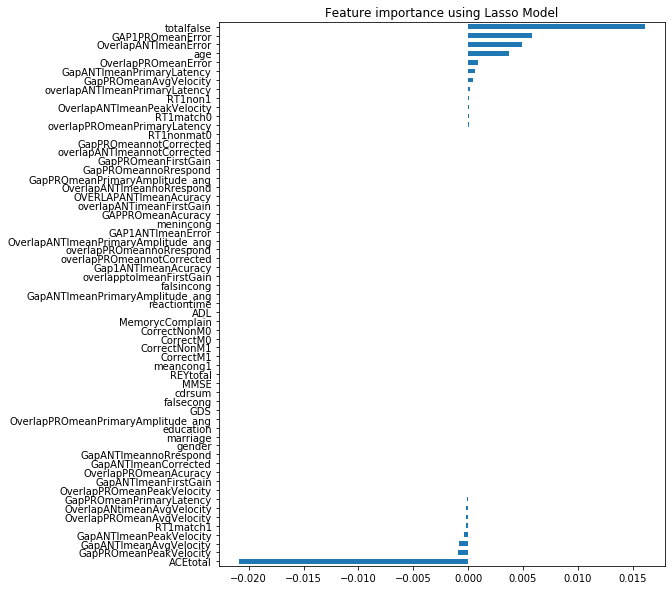

In [53]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

 Removing features with low variance


In [61]:
from sklearn.feature_selection import VarianceThreshold
# X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
z = sel.fit_transform(X)
z = pd.DataFrame(z)
z

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,3.63,454.19,535.00,17.86,2.19,535.00,3.83,405.93,535.00,42.31,...,651.0000,13.0,1140.0000,21.0,549.0000,19.0,918.0000,6.0,1.0,7.0
1,3.48,232.17,0.05,12.90,1.43,0.10,2.60,304.23,0.03,48.57,...,756.0000,8.0,886.0000,12.0,310.0000,0.0,613.0000,3.0,1.0,4.0
2,3.48,526.35,388.05,12.90,1.68,0.10,2.59,302.10,0.03,58.57,...,794.0000,29.0,1039.0000,32.0,668.0000,29.0,793.0000,6.0,0.0,6.0
3,3.59,294.42,0.08,7.69,1.24,0.15,4.85,337.68,0.15,62.94,...,686.0000,4.0,1113.0000,30.0,690.0000,0.0,598.0000,4.0,0.0,4.0
4,2.68,454.91,0.03,34.29,0.44,0.05,2.41,374.53,0.09,57.37,...,834.0000,8.0,1213.0000,13.0,1042.0000,9.0,1031.0000,4.0,0.0,4.0
5,2.49,171.25,0.03,17.14,2.08,0.06,2.28,383.96,0.26,86.96,...,644.0000,29.0,641.0000,28.0,490.0000,32.0,462.0000,2.0,0.0,2.0
6,3.54,462.27,424.00,60.76,2.84,145.00,4.72,409.92,435.00,36.26,...,502.0000,32.0,775.0000,31.0,539.0000,32.0,712.0000,3.0,1.0,4.0
7,3.30,360.33,669.02,0.00,1.38,0.02,2.53,416.55,0.01,41.25,...,1122.0000,4.0,1281.0000,19.0,1127.0000,9.0,1176.0000,2.0,4.0,6.0
8,3.78,338.53,570.82,43.08,1.49,51070.84,4.43,337.14,526.22,26.80,...,978.0000,10.0,1167.0000,19.0,934.0000,17.0,1106.0000,9.0,4.0,13.0
9,3.65,290.35,669.71,31.97,2.25,669.73,3.32,306.59,415.11,75.80,...,741.0000,0.0,921.0000,29.0,628.0000,0.0,1250.0000,3.0,1.0,4.0


Univariate feature selection

In [63]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

print(X.shape)

X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
print(X_new.shape)
pd.DataFrame(X_new)

(85, 61)
(85, 2)


,0,1
0,535.00,535.00
1,0.10,0.05
2,0.10,0.05
3,0.15,0.37
4,0.05,0.17
5,0.06,0.61
6,145.00,135.00
7,0.02,0.02
8,51070.84,556.25
9,669.73,415.14


L1-based feature selection

In [65]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel


X.shape

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape


c:\program files\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(85, 18)

Tree-based feature selection

In [88]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

print(X.shape)

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
print(clf.feature_importances_)  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape               


(85, 61)
[0.00776872 0.00437689 0.00532957 0.01361386 0.01442604 0.01728059
 0.00751675 0.02076621 0.03677418 0.01041522 0.00951567 0.00319341
 0.00510944 0.02094446 0.00733489 0.00475815 0.08060018 0.01663122
 0.00560778 0.00921553 0.00464906 0.02516966 0.02189325 0.01601688
 0.00967931 0.05390896 0.04010445 0.00296382 0.00396175 0.00949346
 0.02668612 0.01915072 0.00738086 0.00776662 0.01517298 0.01429025
 0.02826795 0.00178115 0.00241326 0.02230288 0.00480622 0.00362304
 0.00197474 0.07462172 0.05974725 0.03403862 0.03142185 0.01966617
 0.00549034 0.00589126 0.00357323 0.00278011 0.01266082 0.00796502
 0.0067997  0.00628207 0.01163885 0.0217406  0.01485298 0.02304998
 0.01314329]


(85, 21)

In [100]:

###### Devide data to test and train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=25)

#preprocessing

scaler = preprocessing.StandardScaler().fit(X)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)
X_transformed = scaler.transform(X)


In [101]:
methodList = []
accList = []
sensitivityList = []
specificityList = []

c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

[[49  0]
 [ 0 19]]
Logistic Regression Accuracy by LOOCV 1.0


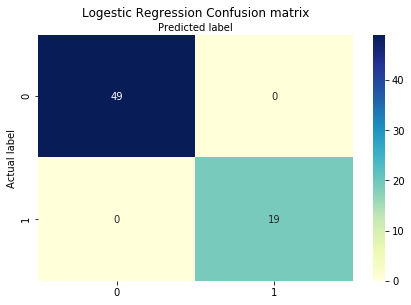

Logestic Regression sensitivity = [0. 1. 1.]and Logestic Regression specificity = [0. 0. 1.]


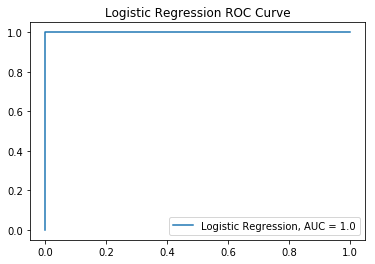

In [102]:
loo = LeaveOneOut()
loo.get_n_splits(X_transformed)
loologreg = LogisticRegression()
predicts=[]

for train_index, test_index in loo.split(X):
    X_train, X_test = X_transformed[train_index], X_transformed[test_index]
    y_train, y_test = y[train_index], y[test_index]
    loologregModel =loologreg.fit(X_train, np.array(list(y_train)))
    predicts.append(loologreg.predict(X_test))

predict = np.array(predicts)
cnf_matrix = metrics.confusion_matrix(y, predict)

print(cnf_matrix)

acc = metrics.accuracy_score(y, predict)
print("Logistic Regression Accuracy by LOOCV", acc)

# recall = metrics.recall_score(y, predict)
# print("Logistic Regression Recall by LOOCV", recall)
#
# precession = metrics.precision_score(y, predict)
# print("Logistic Regression Precession by LOOCV", precession)

######ploting
# import required modules


#matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Logestic Regression Confusion matrix', y=1.1)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()


#### Roc Curve
fpr, tpr, _ = metrics.roc_curve(y,  predict)
auc = metrics.roc_auc_score(y, predict)
print("Logestic Regression sensitivity = "+str(tpr)+"and Logestic Regression specificity = "+str(fpr))
plt.plot(fpr,tpr,label="Logistic Regression, AUC = "+str(auc))
plt.title("Logistic Regression ROC Curve")
plt.legend(loc=4)
plt.show()

methodList.append('Logistic Regression')
accList.append(acc)
sensitivityList.append(tpr[1])
specificityList.append(1-fpr[1])

[[49  0]
 [ 0 19]]
Gaussian Naive Bayes Accuracy by LOOCV 1.0


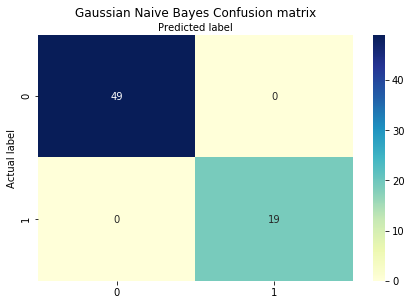

Gaussian Naive Bayes sensitivity = [0. 1. 1.]and Gaussian Naive Bayes specificity = [0. 0. 1.]


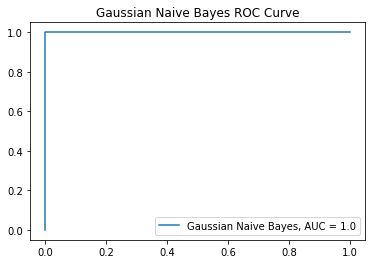

In [103]:

####GaussianNB

loo = LeaveOneOut()
loo.get_n_splits(X)
loologreg = GaussianNB()
predicts=[]
for train_index, test_index in loo.split(X):
    X_train, X_test = X_transformed[train_index], X_transformed[test_index]
    y_train, y_test = y[train_index], y[test_index]
    loologregModel =loologreg.fit(X_train, y_train)
    predicts.append(loologreg.predict(X_test))

predict = np.array(predicts)
cnf_matrix = metrics.confusion_matrix(y, predict)

print(cnf_matrix)

acc = metrics.accuracy_score(y, predict)
print("Gaussian Naive Bayes Accuracy by LOOCV", acc)
######ploting



#matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Gaussian Naive Bayes Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

#### Roc Curve
fpr, tpr, _ = metrics.roc_curve(y,  predict)
auc = metrics.roc_auc_score(y, predict)
print("Gaussian Naive Bayes sensitivity = "+str(tpr)+"and Gaussian Naive Bayes specificity = "+str(fpr))
plt.plot(fpr,tpr,label="Gaussian Naive Bayes, AUC = "+str(auc))
plt.title("Gaussian Naive Bayes ROC Curve")
plt.legend(loc=4)
plt.show()

methodList.append('Gaussian Naive Bayes')
accList.append(acc)
sensitivityList.append(tpr[1])
specificityList.append(1-fpr[1])

[[49  0]
 [ 0 19]]
Support Vector Machine Accuracy by LOOCV 1.0


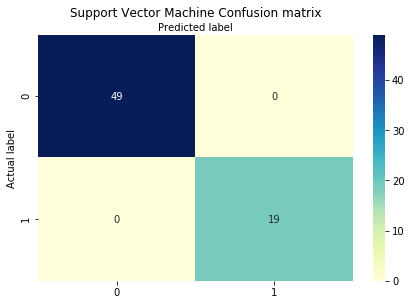

SVM sensitivity = [0. 1. 1.]and SVM specificity = [0. 0. 1.]


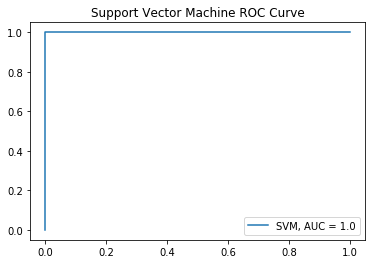

In [104]:

###SVM
loo = LeaveOneOut()
loo.get_n_splits(X)
loologreg = svmachine = svm.SVC(gamma='auto',kernel='rbf',degree=3)

predicts=[]
for train_index, test_index in loo.split(X_transformed):
    X_train, X_test = X_transformed[train_index], X_transformed[test_index]
    y_train, y_test = y[train_index], y[test_index]
    loologregModel =loologreg.fit(X_train, y_train)
    predicts.append(loologregModel.predict(X_test))

predict = np.array(predicts)
cnf_matrix = metrics.confusion_matrix(y, predict)

print(cnf_matrix)

acc = metrics.accuracy_score(y, predict)
print("Support Vector Machine Accuracy by LOOCV", acc)

# recall = metrics.recall_score(y, predict)
# print("Logistic Regression Recall by LOOCV", recall)
#
# precession = metrics.precision_score(y, predict)
# print("Logistic Regression Precession by LOOCV", precession)

######ploting



#matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Support Vector Machine Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

#### Roc Curve

fpr, tpr, _ = metrics.roc_curve(y,  predict)
auc = metrics.roc_auc_score(y, predict)
print("SVM sensitivity = "+str(tpr)+"and SVM specificity = "+str(fpr))
plt.plot(fpr,tpr,label="SVM, AUC = "+str(auc))
plt.title("Support Vector Machine ROC Curve")
plt.legend(loc=4)
plt.show()

methodList.append('Support Vector Machine')
accList.append(acc)
sensitivityList.append(tpr[1])
specificityList.append(1-fpr[1])

In [106]:
result = []
result = pd.DataFrame(result)
result['method'],result['accuracy'],result['sensitivity'],result['specificity']=methodList,accList,sensitivityList,specificityList
result.to_csv('eye-tracking and n-back(3 vs 1).csv',index=False)